In [106]:
import numpy as np
import matplotlib.pyplot as plt

def Y(x):
    return 2.0*(x**3 -x**2 +0.05*x)

# A simple Boundary-Value Problem

Consider the Boundary-Value Problem (BVP)

$$\frac{d^{2}y}{dx^{2}}=12x -4,\quad y(0)=0,\quad y(1) = 0.1$$

Solve the BVP ODE with the shooting method.

Fisrt, we need to rewrite the second-order ODE as two first-order ODEs:

$$\frac{dy}{dx}=u(x)$$

$$\frac{du}{dx} = 12x - 4$$

This is really simple BVP and therefore it will require only very few shooting iterations for reasonable guesses. Hence use the initial values $u(0) = z_{o} = -1100000.0 $ and  $u(0) = z_{1} = -10000000.0$ as initial guesses so that you get to do at least two iterations of shooting.

Solve the problema by implementing an RK2(or higher) integrator. Demonstrate convergence. Make a plot of your solution for $y(x)$ and compare it with the true solution is 

$$y(x) = 2x^{3}-2x^{2}+0.1x$$

A shooting method transforms a two-point problema into an initial-value problem an attempts on a trial and error basis to reproduce the second boundary condition

Let us consider the general second order two point problem with Dirichlet boundary conditions

$$\frac{d^{2}y}{dx^{2}}=f(x,y,y')$$
$$y(x_{a}) = y_{a}\quad y(x_{b}) = y_{b}$$

whose solution $y(x)$ are supposed to be continuous. The derivative $y'(x_{a}) = y'(x_{a})$ at the left interval boundary is not know a priori, but it is *univocally defined*  by the boundary conditions. Suppossing that y'_{a} was know from the beginning, the two-point problem could be replaced by the equivalent initial-value problem 


$$\frac{d^{2}y}{dx^{2}}=f(x,y,y')$$
$$y(x_{a}) = y_{a}\quad y'(x_{a}) = y'{a}$$

having the same solution and also satisfying the unused boundary condition. Let asume that we start the propagation of the solution, instead of the true first derivarive $y'_{a}$with a pair of trial derivatves $y'^{(1)}_{a}<y'^{(2)}_{a}$ and thta we obtain, correspondingly, two different solutions of the problem, for which the values at the end point $x_{b}$ are $y^{(1)}_{b}$ andm respectly y'^{(2)}_{b}.

If both $y^{(1)}_{a}$ y $y^{(2)}_{a}$ deviate by the same sign from the true end value $y_{b}$, by virtue of the continuity of the solution, it follows that tru derivative $y'_{a}$ is not contained between the initial trial values $y^{(1)}_{a}$ and 

Solve the BVP ODE with the finite-difference method

$$\frac{d^{2}y}{dx^{2}}=12x -4,\quad y(0)=0,\quad y(1) = 0.1$$

consider a central diference in the derivative we have

$\left(\frac{d^{2}y}{dx^{2}}\right)_{i} = \frac{y_{i+1}(x_{i}-x_{i-1})-y_{i}(x_{i+1}-x_{i-1})+y_{i-1}(x_{i+1}-x_{i+1}))}{(x_{i+1})^{2}(x_{i}-x_{i-1})}$

So

$$\frac{y_{i+1}}{(x_{i+1}-x_{i-1})(x_{i+1}+x_{i})}+\frac{y_{i-1}}{(x_{i+1}-x_{i-1})(x_{i}-x_{i-1})}-\frac{y_{i}}{(x_{i+1}-x_{i})(x_{i}-x_{i-1})} = \frac{12x_{i}-4}{2}$$

we define

$$r_{1} = x_{i+1}-x_{i-1}$$
$$r_{2} = x_{i+1}-x_{i-1}$$
$$r_{3} = x_{i}-x_{i-1}$$

Now

$$y_{i} = r_{2}r_{3}\left(\frac{y_{i+1}}{r_{1}r_{2}}+\frac{y_{i-1}}{r_{1}r_{3}}-(6x_{i}-2)\right)$$

with the boundary conditions 

$$y_{o} = 0 \qquad y_{n} = 0.1$$


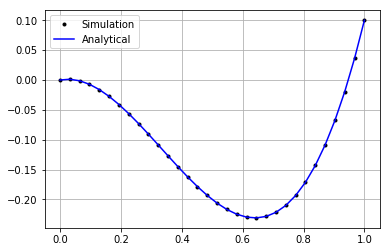

In [105]:
n = 32
b = 1.0 ; a = 0.0
dx = (b-a)/n
x = np.linspace(a,b,n)
y = np.zeros(n)
y[0] = 0.0 ; y[-1] = 0.1
E = 1.0
aux = 0
dif =1e-1
while(np.abs(dif) > 1e-10):
    aux = E
    for i in range(1,n-1):
        r1 = x[i+1]-x[i-1]
        r2 = x[i+1]-x[i]
        r3 = x[i]-x[i-1]
        y[i] = ((r2*r3)/(r1*r2))*y[i+1] + ((r2*r3)/(r1*r3))*y[i-1] - r2*r3*(6.0*x[i]-2.0)
    E = np.abs(np.mean((y[1:-1]-Y(x)[1:-1])/Y(x)[1:-1]))
    dif = E-aux

plt.plot(x,y,"k.",label = "Simulation")
plt.plot(x,Y(x),"b-",label = "Analytical")
plt.grid(True)
plt.legend()
